In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [69]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [70]:
data.shape

(381109, 12)

In [71]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [72]:
df = data

In [73]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [74]:
data.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [75]:
df['Vehicle_Age_Encoded']  = df['Vehicle_Age'] \
                                            .replace({'1-2 Year': 1, '< 1 Year': 0, '> 2 Years': 3})

df['Gender_Encoded']  = df['Gender'] \
                                            .replace({'Male': 1, 'Female': 2})

df['Vehicle_Damage_Enoded']  = df['Vehicle_Damage'] \
                                            .replace({'Yes': 1, 'No': 0})





In [76]:
df.drop(['Gender', 'Vehicle_Age', 'Vehicle_Damage'],axis=1, inplace=True)

In [77]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Encoded,Gender_Encoded,Vehicle_Damage_Enoded
0,1,44,1,28.0,0,40454.0,26.0,217,1,3,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,3,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,2,0


<AxesSubplot:>

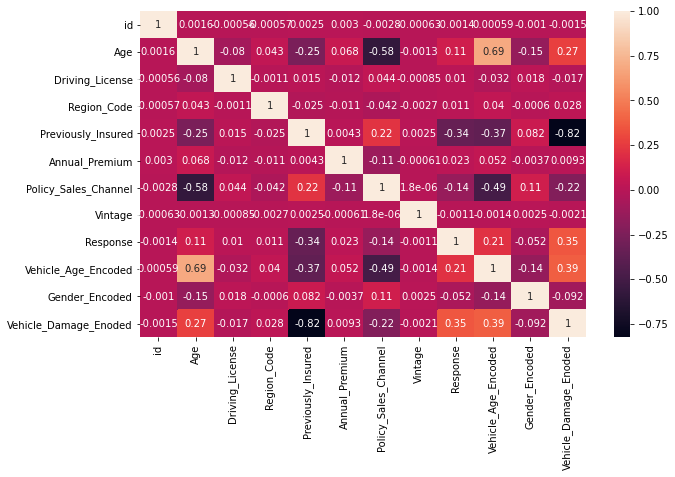

In [78]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [79]:
df['Annual_Premium'].value_counts()

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

In [80]:
#groups = ['Low', 'Med', 'High', 'Exp']

#df['Annual_Premium_qcut'] = pd.qcut(df['Annual_Premium'], q=4, labels=groups)
#df[['Annual_Premium', 'Annual_Premium_qcut']].tail()

In [81]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_Encoded,Gender_Encoded,Vehicle_Damage_Enoded
0,1,44,1,28.0,0,40454.0,26.0,217,1,3,1,1
1,2,76,1,3.0,0,33536.0,26.0,183,0,1,1,0
2,3,47,1,28.0,0,38294.0,26.0,27,1,3,1,1
3,4,21,1,11.0,1,28619.0,152.0,203,0,0,1,0
4,5,29,1,41.0,1,27496.0,152.0,39,0,0,2,0


Feature: 0, Score: 0.13787
Feature: 1, Score: 0.00050
Feature: 2, Score: 0.10678
Feature: 3, Score: 0.05289
Feature: 4, Score: 0.25385
Feature: 5, Score: 0.06158
Feature: 6, Score: 0.28206
Feature: 7, Score: 0.01985
Feature: 8, Score: 0.01235
Feature: 9, Score: 0.07226


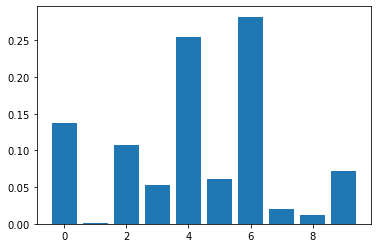

In [86]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
y = df.Response
X = df.drop(['id', 'Response'],axis=1)

model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()